install ucimlrepo

In [14]:
pip install ucimlrepo

Import necessary libraries

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


Fetch and load dataset

In [16]:
# Load the UCI breast cancer dataset
breast_cancer_data = fetch_ucirepo(id=17)

# Extract features and target
X = breast_cancer_data.data.features
y = breast_cancer_data.data.targets

# Display dataset metadata
print("Dataset Metadata:")
print(breast_cancer_data.metadata)


Dataset Metadata:
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal

Preprocessing dataset

In [17]:
# Preprocessing code for Breast Cancer dataset
# Check for missing values
print("Missing values in each column:\n", X.isnull().sum())

# Check the target class distribution
print("\nTarget class distribution:\n", y.value_counts())

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature variables (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show the scaled data
print("\nScaled data (first 5 rows of X_train):\n", pd.DataFrame(X_train_scaled, columns=X.columns).head())


Missing values in each column:
 radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

Target class distribution:
 Diagnosis
B            357
M            212
Name: count, dtype: int64

Scaled data (first 5 rows of X_train):
     radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0  0.518559  0.891826

Exploratory Data Analysis


Summary statistics:
           radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.06492

<ipython-input-18-40b1323db9a0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


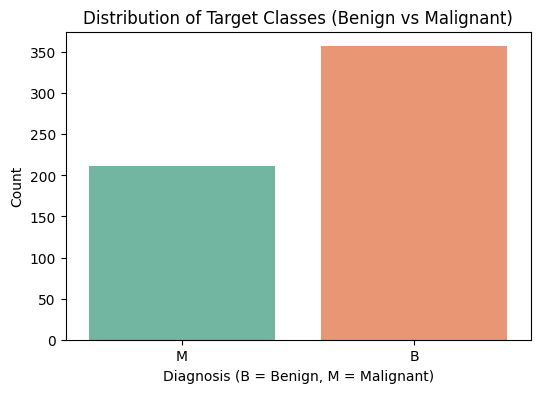

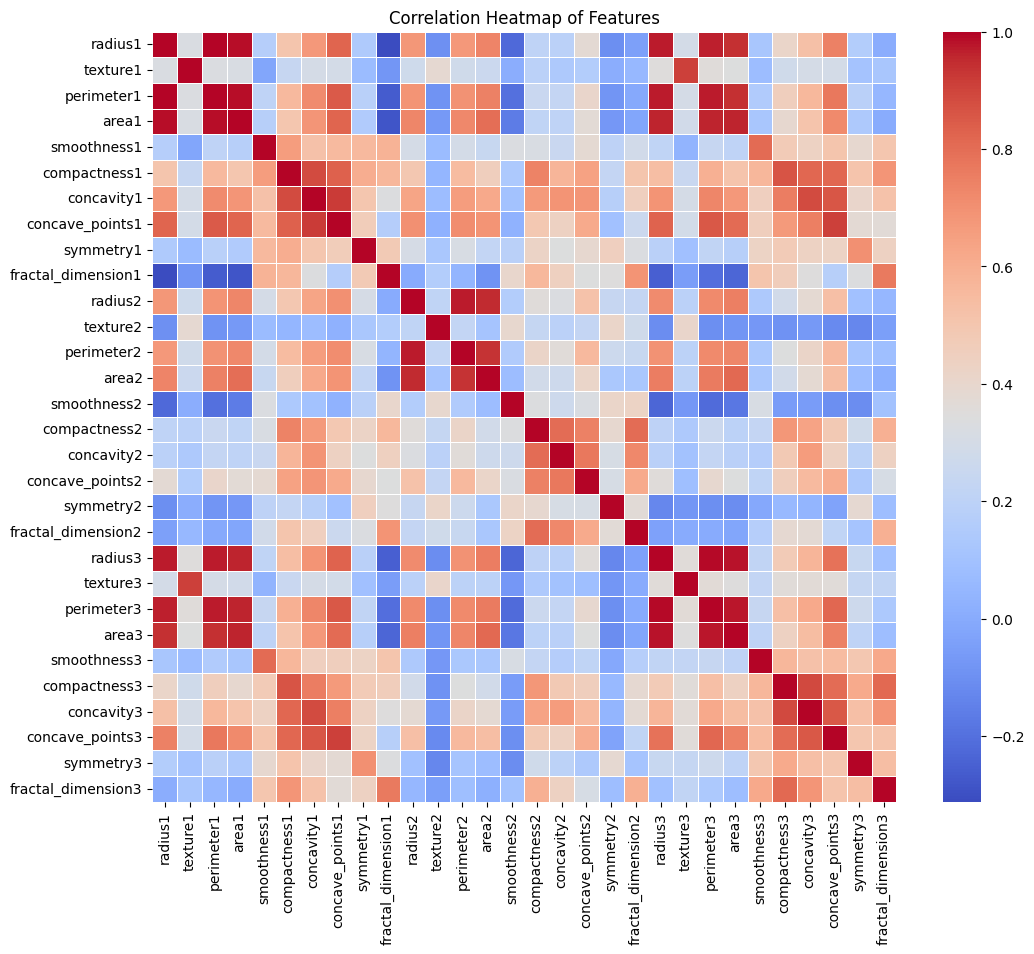

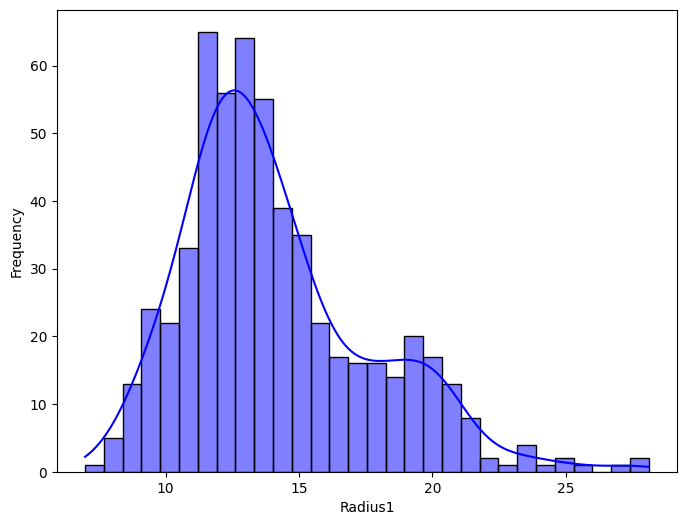

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


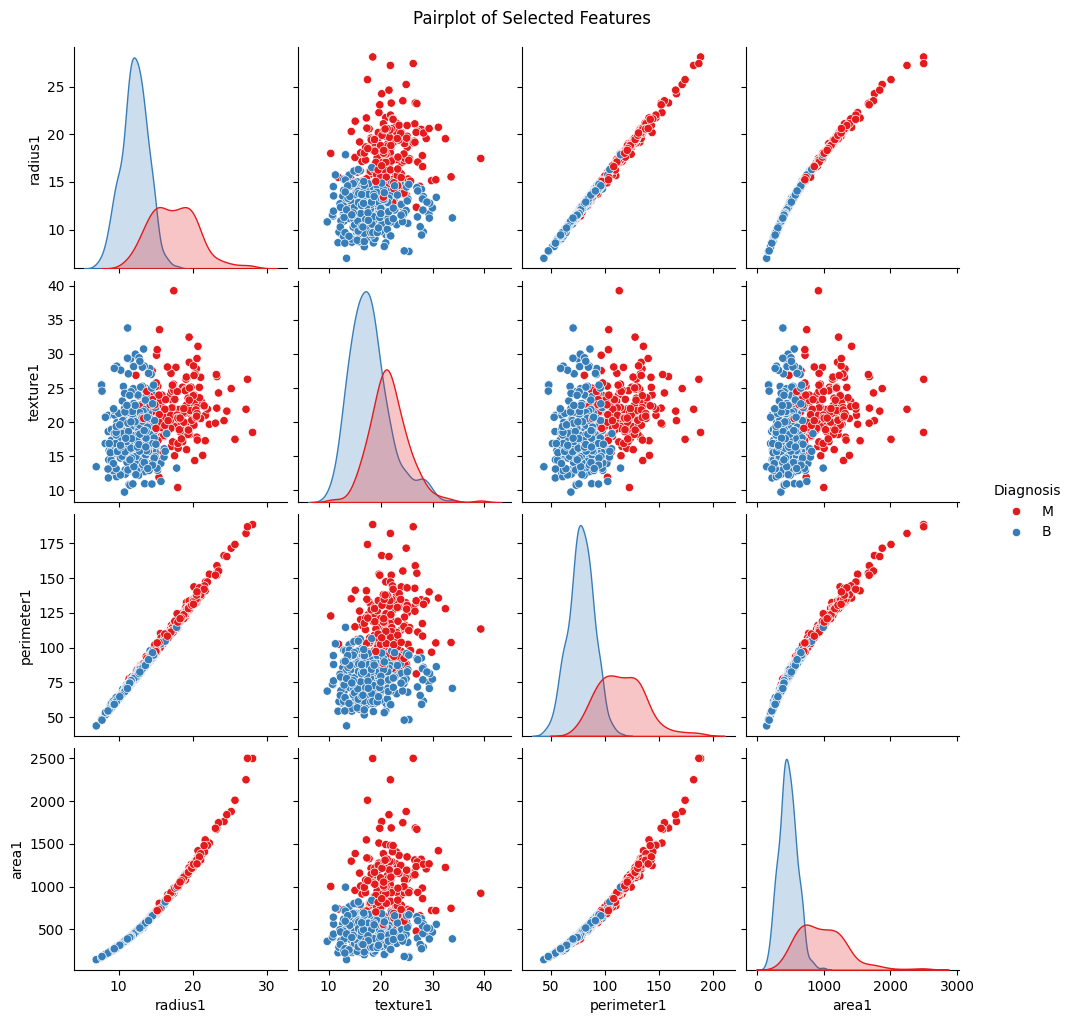

In [18]:

# Ensure y is a pandas Series and has correct values
if isinstance(y, pd.DataFrame):
    y = y.squeeze()
# Display basic statistics for the feature variables
print("\nSummary statistics:\n", X.describe())

# Visualize the distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribution of Target Classes (Benign vs Malignant)")
plt.xlabel("Diagnosis (B = Benign, M = Malignant)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap to check relationships between variables
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Step 1: Visualize the distribution of a key feature (e.g., 'radius1')
plt.figure(figsize=(8, 6))
sns.histplot(X['radius1'], bins=30, kde=True, color='blue')
plt.xlabel("Radius1")
plt.ylabel("Frequency")
plt.show()

# Step 2: Define the features to plot for the pairplot
features_to_plot = ['radius1', 'texture1', 'perimeter1', 'area1']
print(X.columns)

# Step 3: Combine the selected features with the target variable for the pairplot
df_pairplot = X[features_to_plot].join(y.rename("Diagnosis"))

# Step 4: Create a pairplot with the selected features and the 'Diagnosis' target variable
sns.pairplot(df_pairplot, hue='Diagnosis', palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()



In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [20]:
# Detect outliers using Z-score
z_scores = np.abs(zscore(X))
outliers_removed = (z_scores < 3).all(axis=1)  # Keep rows with Z-score < 3
X_clean = X[outliers_removed]
y_clean = y[outliers_removed]

print(f"Data after outlier removal: {X_clean.shape[0]} rows")


Data after outlier removal: 495 rows


In [21]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Optional: Feature engineering (e.g., adding polynomial features)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

print(f"Feature shape after polynomial transformation: {X_poly.shape}")


Feature shape after polynomial transformation: (495, 465)


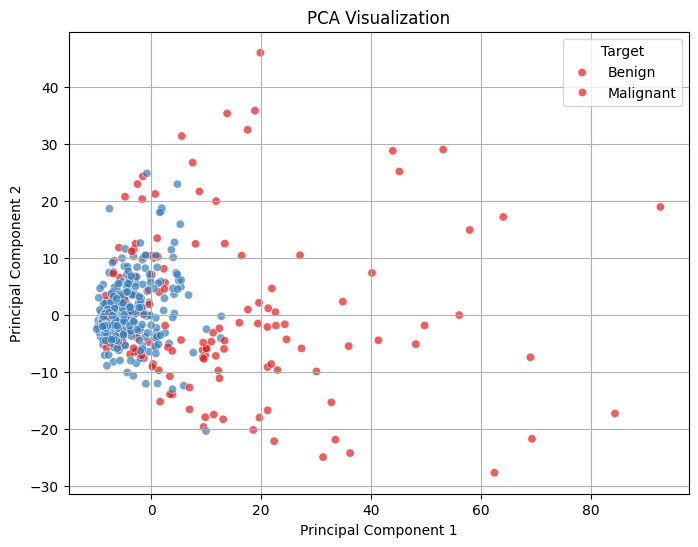

In [22]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_poly)

# Visualize PCA components
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Target"] = y_clean.values

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Target", data=pca_df, palette="Set1", alpha=0.7)
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target", labels=["Benign", "Malignant"])
plt.grid()
plt.show()


Logistic Regression is a statistical method used for classifying data into two or more categories. It predicts the probability of an event occurring based on input features.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training Accuracy: 0.9560439560439561
Logistic Regression Test Accuracy: 0.956140350877193

Classification Report (Test Data):
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



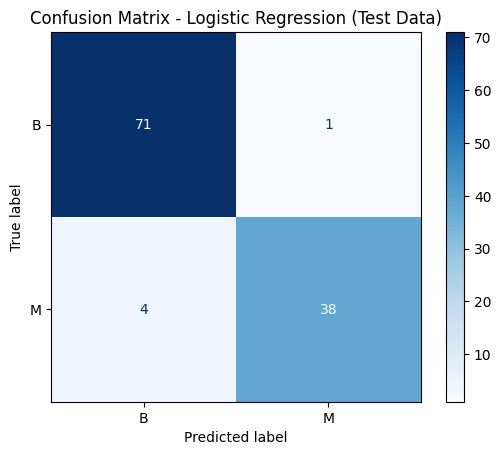

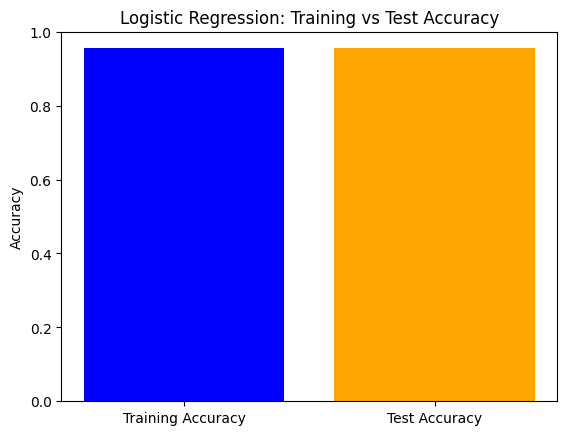

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on both training and test datasets+
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression model
train_accuracy = accuracy_score(y_train, y_train_pred_log_reg)
test_accuracy = accuracy_score(y_test, y_test_pred_log_reg)

print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Test Accuracy:", test_accuracy)
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred_log_reg))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_log_reg)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Test Data)")
plt.show()

# Plot Training vs. Test Accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Logistic Regression: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9736842105263158

Classification Report (Test Data):
               precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



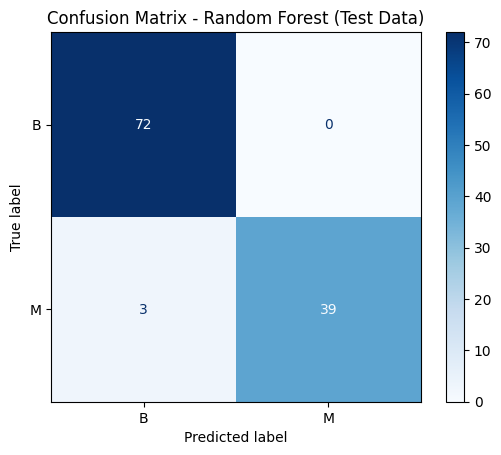

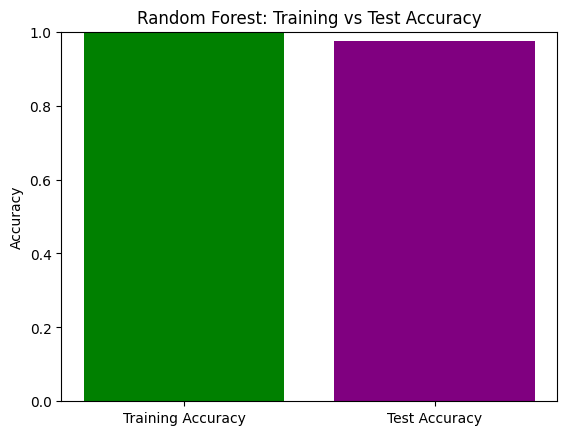

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on both training and test datasets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Training Accuracy:", train_accuracy_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred_rf))

# Confusion matrix for test data
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

# Plot Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Test Data)")
plt.show()

# Plot Training vs. Test Accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracies_rf = [train_accuracy_rf, test_accuracy_rf]

plt.bar(labels, accuracies_rf, color=['green', 'purple'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Random Forest: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()


XGBoost Training Accuracy: 1.0
XGBoost Test Accuracy: 1.0

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       125

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        38

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



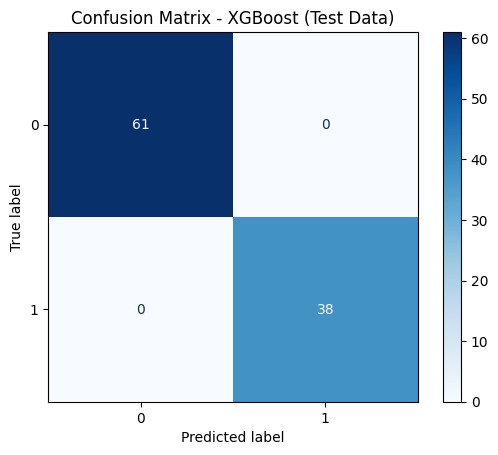

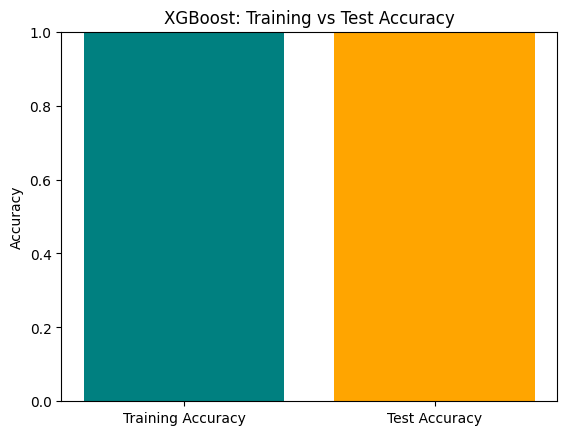

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Ensure y is encoded numerically (0 for Benign, 1 for Malignant)
y_clean = y_clean.map({'B': 0, 'M': 1})

# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Convert data into NumPy arrays
X_train_clean = np.array(X_train)
X_test_clean = np.array(X_test)
y_train_clean = np.array(y_train)
y_test_clean = np.array(y_test)

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train_clean, y_train_clean)

# Make predictions on both training and test datasets
y_train_pred_xgb = xgb_model.predict(X_train_clean)
y_test_pred_xgb = xgb_model.predict(X_test_clean)

# Evaluate the XGBoost model
train_accuracy_xgb = accuracy_score(y_train_clean, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test_clean, y_test_pred_xgb)

print("XGBoost Training Accuracy:", train_accuracy_xgb)
print("XGBoost Test Accuracy:", test_accuracy_xgb)

print("\nClassification Report (Training Data):")
print(classification_report(y_train_clean, y_train_pred_xgb))

print("\nClassification Report (Test Data):")
print(classification_report(y_test_clean, y_test_pred_xgb))

# Confusion matrix for test data
conf_matrix_xgb = confusion_matrix(y_test_clean, y_test_pred_xgb)

# Plot Confusion Matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=[0, 1])
disp_xgb.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost (Test Data)")
plt.show()

# Plot Training vs. Test Accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracies_xgb = [train_accuracy_xgb, test_accuracy_xgb]

plt.bar(labels, accuracies_xgb, color=['teal', 'orange'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('XGBoost: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()
